In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.proportion import proportion_confint
#import pylab
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

In [119]:
temp = open('videodata-wgxmwm-x521b2.txt').read().splitlines()
templist = []
for i in temp:
    templist += [i.split(' ')]
data_1_raw = []
for i in templist:
    lst = []
    for j in i:
        if j != '':
            lst += [j]
    data_1_raw += [lst]
    lst = []

In [120]:
data_1 = pd.DataFrame(data_1_raw[1:], columns = data_1_raw[0])
data_1 = data_1.applymap(lambda x: pd.to_numeric(x))

In [121]:
data_1.head()

,time,like,where,freq,busy,educ,sex,age,home,math,work,own,cdrom,email,grade
0,2.0,3.0,3.0,2.0,0.0,1.0,0.0,19.0,1.0,0.0,10.0,1.0,0.0,1.0,4.0
1,0.0,3.0,3.0,3.0,0.0,0.0,0.0,18.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0
2,0.0,3.0,1.0,3.0,0.0,0.0,1.0,19.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0
3,0.5,3.0,3.0,3.0,0.0,1.0,0.0,19.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0
4,0.0,3.0,3.0,4.0,0.0,1.0,0.0,19.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0


In [122]:
data_2 = pd.read_csv('data_2.csv')

In [123]:
data_2.T

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
Unnamed: 0,1,2,3,4,5,6,7,8,9,10,...,82,83,84,85,86,87,88,89,90,91
action,0,0,1,0,0,1,1,0,1,1,...,0,0,1,1,1,0,1,1,0,1
adv,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,1,0,1,0,0,0
sim,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
sport,0,0,1,0,0,1,1,1,1,0,...,0,1,0,0,1,1,0,0,1,0
strategy,1,1,1,1,1,1,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1
relax,1,0,1,0,1,1,1,1,0,1,...,0,1,1,1,1,0,1,1,0,1
coord,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
challenge,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
master,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [124]:
data_1.describe()

,time,like,where,freq,busy,educ,sex,age,home,math,work,own,cdrom,email,grade
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,1.242857,4.076923,21.967033,16.461538,12.153846,14.549451,0.582418,19.516484,0.758242,1.406593,10.373626,0.736264,5.604396,0.791209,3.252747
std,3.777040,10.098659,38.476097,33.896020,32.384126,34.670918,0.495893,1.846093,0.430521,10.354793,19.327958,0.443099,22.647482,0.408697,0.607242
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
50%,0.000000,3.000000,3.000000,3.000000,0.000000,1.000000,1.000000,19.000000,1.000000,0.000000,5.000000,1.000000,0.000000,1.000000,3.000000
75%,1.250000,3.000000,5.000000,4.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,14.500000,1.000000,0.000000,1.000000,4.000000
max,30.000000,99.000000,99.000000,99.000000,99.000000,99.000000,1.000000,33.000000,1.000000,99.000000,99.000000,1.000000,99.000000,1.000000,4.000000


In [125]:
#data_2.describe()

In [143]:
#Bootstrap of data_1
sample_pool = []
copy = data_1.copy()
for i in range(500):
    sample = copy.sample(replace=True, n = len(copy))
    sample_pool += [sample]

# Scenario 1

In [144]:
# The fraction of students who played a video games in the week prior to they survey.

In [145]:
#Point estimation

In [146]:
data_1['time'] = data_1['time'].replace(99, 0).replace(np.NaN, 0)

In [147]:
num_notplayed = len(data_1[data_1['time']!=0])
num_total = len(data_1)
fraction_point_estimation = num_notplayed / num_total
fraction_point_estimation

0.3695652173913043

In [148]:
#Interval estimation w/ calculation

In [149]:
ci_low, ci_upp = proportion_confint(num_notplayed, num_total, alpha=0.05, method='normal')

In [132]:
ci_low, ci_upp

(0.2709327709559663, 0.46819766382664235)

In [150]:
# Interval estimation w/ bootstrap

In [152]:
fraction_pool = []
for i in sample_pool:
    i['time'] = i['time'].replace(99, 0).replace(np.NaN, 0)
    num_notplayed = len(i[i['time']!=0])
    num_total = len(i)
    fraction_point_estimation = num_notplayed / num_total
    fraction_pool += [fraction_point_estimation]
ci_low, ci_upp = np.percentile(fraction_pool, 2.5), np.percentile(fraction_pool, 97.5)
ci_low, ci_upp

(0.2717391304347826, 0.4782608695652174)

# Scenario 2

In [153]:
# Frequency of play & the fact of exam affect the frequency

In [154]:
data_1['freq'] = data_1['freq'].replace(np.NaN, 99)

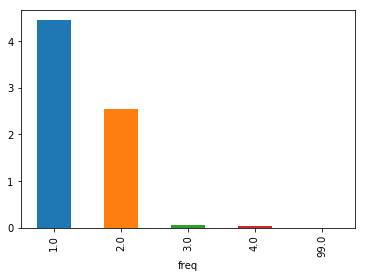

In [155]:
data_1.groupby('freq')['time'].mean().plot(kind = 'bar')

In [ ]:
# With Bootstrapped data

In [140]:
#exam

# Scenario 3

In [32]:
# Interval average amount of time spent playing video games in the week priors to the survey

# Overall shape of the distribution

In [161]:
#w/ built-in t package

In [160]:
sms.DescrStatsW(data_1['time']).tconfint_mean()

(0.4509919593598338, 2.007703692814079)

In [162]:
#w / bootstrap

In [164]:
mean_time = []
for i in sample_pool:
    i['time'] = i['time'].replace(99, 0).replace(np.NaN, 0)
    mean_time += [i['time'].mean()]
np.percentile(mean_time, 2.5), np.percentile(mean_time, 97.5)

(0.6205978260869566, 2.1123369565217387)

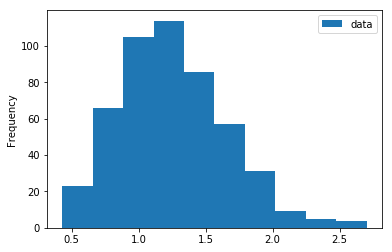

In [169]:
pd.DataFrame( 
    {'data':mean_time}
).plot(kind = 'hist')

In [ ]:
# Simulation

# Scenario 4

In [11]:
# Do you think students enjoy the game?

# list of the most important reason students like or dislike video games

# Nonrespondent who asked to skip the question

In [191]:
data_2.drop(columns = ['Unnamed: 0', 'other', 'other2']).sum().sort_values(ascending = False)

relax        58.0
strategy     55.0
action       45.0
time         42.0
cost         35.0
sport        34.0
point        29.0
master       25.0
adv          25.0
bored        24.0
frust        23.0
graphic      23.0
challenge    21.0
rules        17.0
sim          15.0
boring       14.0
coord         4.0
lonely        4.0
friends       2.0
dtype: float64

In [200]:
len(data_1[data_1['educ'] == 1])

37

# Scenario 5

In [201]:
#differences between those who like to play video games
#andthose who don’t.

#use the questions in the last part of the survey, 
#and make comparisons between male and female students, 
#those who work for pay and those 
#who don’t, those who own a computer and those who don’t

In [206]:
# like to play 2&3 vs 1&4&5&99&null

In [236]:
like = data_1[(data_1['like']==2) \
             |(data_1['like']==3)]
notlike = data_1[(data_1['like'] == 1) | \
              (data_1['like'] == 4) |\
              (data_1['like'] == 5) |\
              (data_1['like'] == 99) |\
              (data_1['like'].isnull())]

In [237]:
like.groupby('sex')['sex'].size()

sex
0.0    26
1.0    43
Name: sex, dtype: int64

In [238]:
like.groupby('own')['own'].size()

own
0.0    21
1.0    48
Name: own, dtype: int64

In [239]:
notlike.groupby('sex')['sex'].size()

sex
0.0    12
1.0    10
Name: sex, dtype: int64

In [240]:
notlike.groupby('own')['own'].size()

own
0.0     3
1.0    19
Name: own, dtype: int64

In [ ]:
# 2&3 vs 1&4&5

In [243]:
like = data_1[(data_1['like']==2) \
             |(data_1['like']==3)]
notlike = data_1[(data_1['like'] == 1) | \
              (data_1['like'] == 4) |\
              (data_1['like'] == 5)]

In [244]:
like.groupby('sex')['sex'].size()

sex
0.0    26
1.0    43
Name: sex, dtype: int64

In [245]:
like.groupby('own')['own'].size()

own
0.0    21
1.0    48
Name: own, dtype: int64

In [246]:
notlike.groupby('sex')['sex'].size()

sex
0.0    12
1.0     9
Name: sex, dtype: int64

In [247]:
notlike.groupby('own')['own'].size()

own
0.0     3
1.0    18
Name: own, dtype: int64

In [ ]:
# 2 vs 1&5

In [248]:
like = data_1[(data_1['like']==2)]
notlike = data_1[(data_1['like'] == 1) | (data_1['like'] == 5)]

In [249]:
like.groupby('sex')['sex'].size()

sex
0.0     5
1.0    18
Name: sex, dtype: int64

In [250]:
like.groupby('own')['own'].size()

own
0.0     5
1.0    18
Name: own, dtype: int64

In [251]:
notlike.groupby('sex')['sex'].size()

sex
0.0    4
1.0    4
Name: sex, dtype: int64

In [252]:
notlike.groupby('own')['own'].size()

own
0.0    2
1.0    6
Name: own, dtype: int64

In [ ]:
#Graphical display and cross-tabulations 
#are particularly helpful in making these kinds of comparisons.

In [ ]:
#you may want to collapse the range of responses to 
#a question down to two or three possibilities before making these comparisons.

# Scenario 6

In [202]:
# Investigate the grade assignments of the gaming